In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-minrescg-indefinite)

The following matrix is indefinite.

In [2]:
A = FNC.poisson(10) - 20I
λ = eigvals(Matrix(A))
isneg = @. λ < 0
@show sum(isneg), sum(.!isneg);

(sum(isneg), sum(.!(isneg))) = (13, 87)

We can compute the relevant quantities from {numref}`Theorem {number} <theorem-minrescg-indefinite>`.

In [3]:
mn, mx = extrema(-λ[isneg])
κ₋ = mx / mn
mn, mx = extrema(λ[.!isneg])
κ₊ = mx / mn
ρ = (sqrt(κ₋ * κ₊) - 1) / (sqrt(κ₋ * κ₊) + 1)

0.9026418585584018

Because the iteration number $m$ is halved in {eq}`minres-conv`, the rate constant of linear convergence is the square root of this number, which makes it even closer to 1.

Now we apply MINRES to a linear system with this matrix, and compare the observed convergence to the upper bound from the theorem.

```{index} ! Julia; minres
```

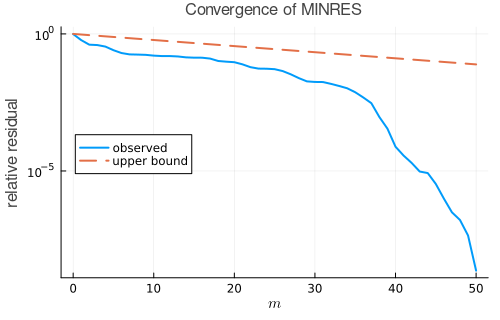

In [4]:
using IterativeSolvers
b = rand(100)
x, hist = minres(A, b, reltol=1e-10, maxiter=51, log=true);
relres = hist[:resnorm] / norm(b)
m = 0:length(relres)-1
plot(m, relres;
    label="observed", legend=:left,
    xaxis=L"m",  yaxis=(:log10, "relative residual"),
    title=("Convergence of MINRES"))
plot!(m, ρ .^ (m / 2), l=:dash, label="upper bound")

The upper bound turns out to be pessimistic here, especially in the later iterations. However, you can see a slow linear phase in the convergence that tracks the bound closely.